In [43]:
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
train = pd.read_csv("../../data/author/train.csv")

In [45]:
train.describe()

,id,text,author
count,19579,19579,19579
unique,19579,19579,3
top,id03507,There was none of the exotic technique you see...,EAP
freq,1,1,7900


In [7]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
            x = train.author.map(z).unique(),
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [21]:
all_words = train['text'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [53]:
eap = train[train.author=="EAP"]["text"].values
hpl = train[train.author=="HPL"]["text"].values
mws = train[train.author=="MWS"]["text"].values

In [61]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from PIL import Image

In [59]:
Mask_1 = np.array(Image.open("./1.png"))
Mask_2 = np.array(Image.open("./2.png"))
Mask_3 = np.array(Image.open("./3.png"))

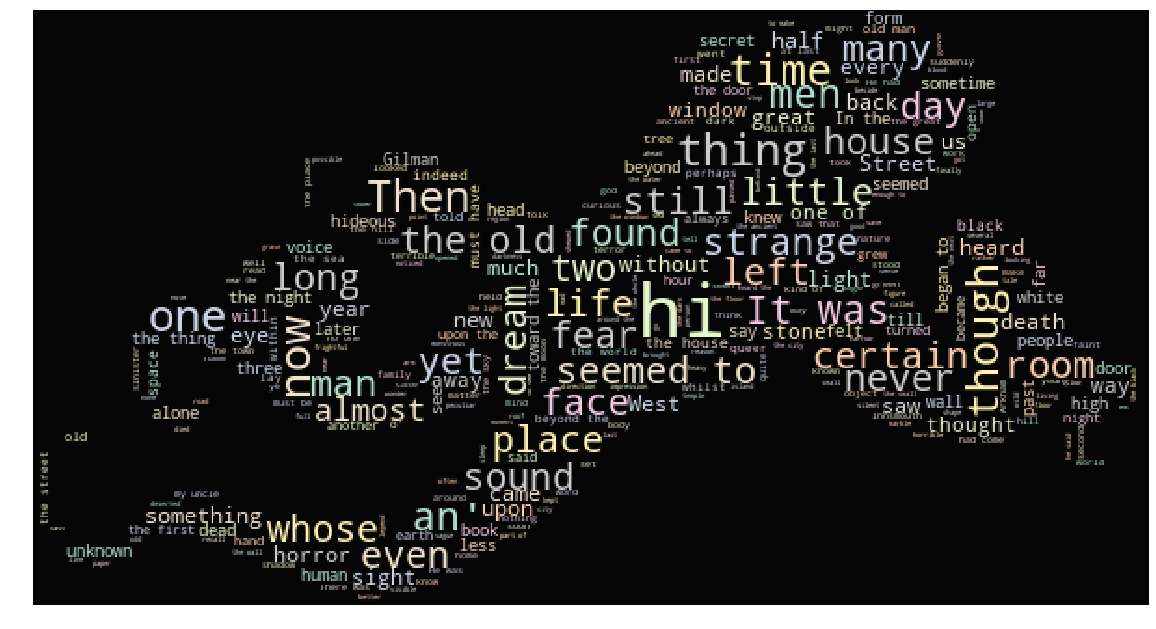

In [66]:
# Here we take the color of the image and impose it over our wordcloud
image_colors_1 = ImageColorGenerator(Mask_1)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask_1,
              max_words=10000, stopwords=STOPWORDS, max_font_size= 40).generate(" ".join(hpl))

# Size of the image generated 
plt.figure(figsize=(20,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
# plt.imshow(wc.recolor(color_func=image_colors_1),interpolation="hamming")
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

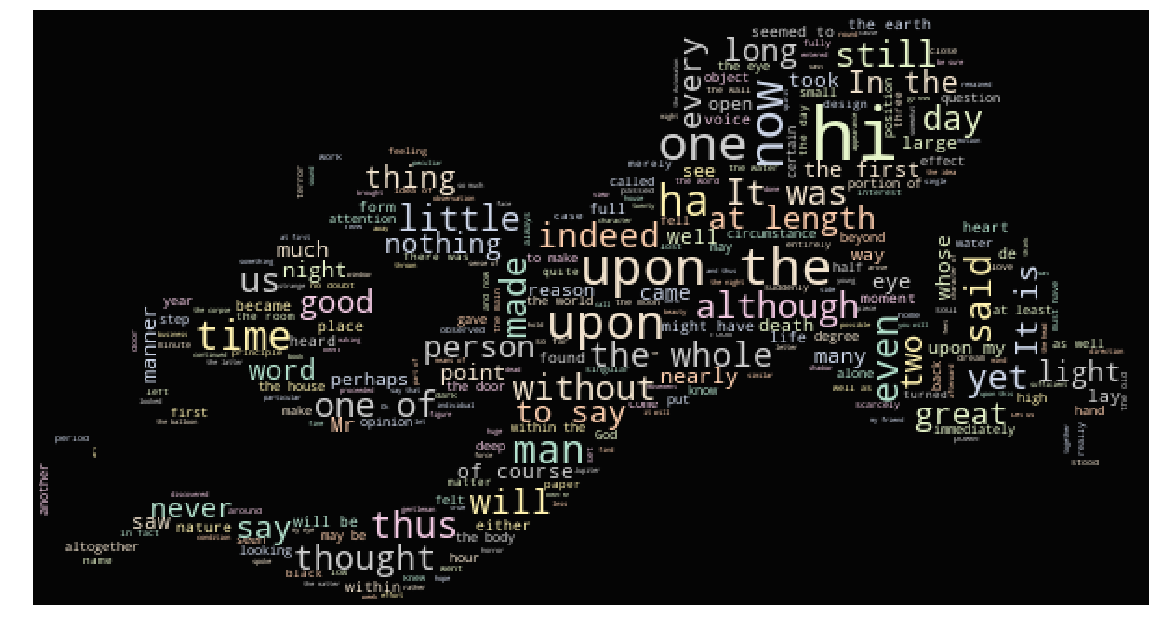

In [73]:
# Here we take the color of the image and impose it over our wordcloud
image_colors_2 = ImageColorGenerator(Mask_2)

# Now we use the WordCloud function from the wordcloud library 
wc1 = WordCloud(background_color='black', height=1500, width=4000,mask=Mask_1,
              max_words=10000, stopwords=STOPWORDS, max_font_size= 40).generate(" ".join(eap))

# Size of the image generated 
plt.figure(figsize=(20,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
# plt.imshow(wc.recolor(color_func=image_colors_1),interpolation="hamming")
plt.imshow(wc1.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

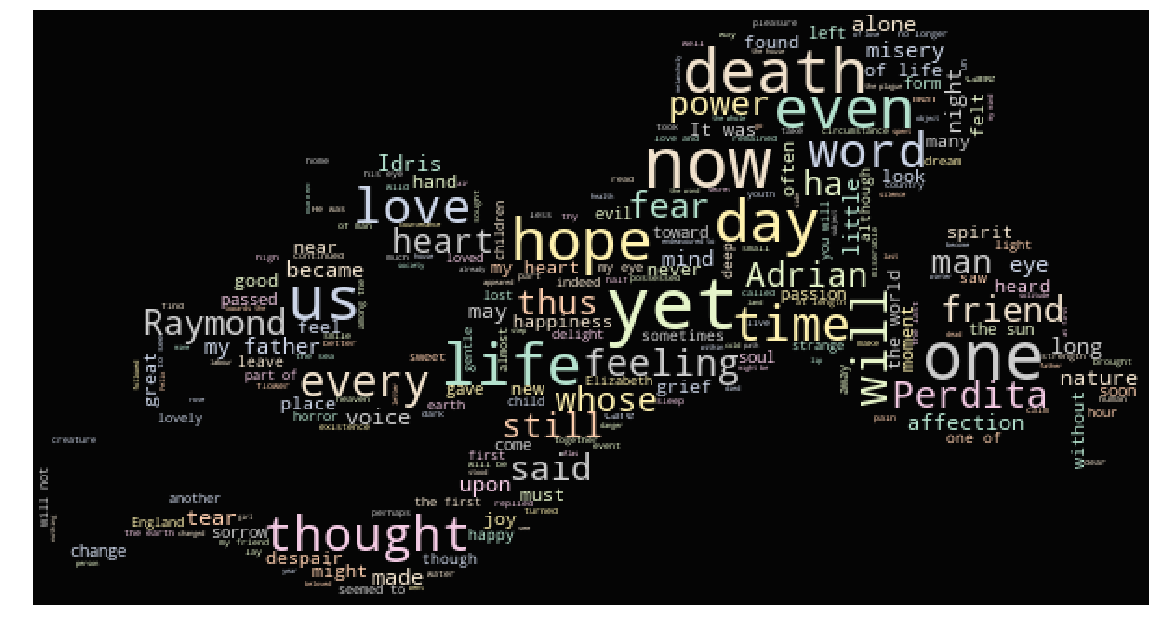

In [76]:
# Here we take the color of the image and impose it over our wordcloud

# Now we use the WordCloud function from the wordcloud library 
wc1 = WordCloud(background_color='black', height=1500, width=4000,mask=Mask_1,
              max_words=10000, stopwords=STOPWORDS, max_font_size= 40).generate(" ".join(mws))

# Size of the image generated 
plt.figure(figsize=(20,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
# plt.imshow(wc.recolor(color_func=image_colors_1),interpolation="hamming")
plt.imshow(wc1.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

In [77]:
import nltk

In [81]:
stopwords = nltk.corpus.stopwords.words('english')

In [82]:
first_text_list_cleaned = [word for word in first_text_list if word.lower() not in stopwords]
print(first_text_list_cleaned)
print("="*90)
print("Length of original list: {0} words\n"
      "Length of list after stopwords removal: {1} words"
      .format(len(first_text_list), len(first_text_list_cleaned)))

['process', ',', 'however', ',', 'afforded', 'means', 'ascertaining', 'dimensions', 'dungeon', ';', 'might', 'make', 'circuit', ',', 'return', 'point', 'whence', 'set', ',', 'without', 'aware', 'fact', ';', 'perfectly', 'uniform', 'seemed', 'wall', '.']
Length of original list: 48 words
Length of list after stopwords removal: 28 words


In [ ]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))
Here we have utilised some subtle concepts from Object-Oriented Programming (OOP). We have essentially inherited and subclassed the original Sklearn's CountVectorizer class and overwritten the build_analyzer method by implementing the lemmatizer for each list in the raw text matrix.

# Storing the entire training text in a list
text = list(train.text.values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)